In [2]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
seaborn.__version__

'0.9.0'

In [11]:
# Leer los datos
dataset = pandas.read_csv('data/the-human-freedom-index-hfi_cc_2018.csv')
print('Tamaño de la tabla: {} filas, {} columnas'.format(dataset.shape[0], dataset.shape[1]))
print('Muestra de la tabla:')
dataset.head(3)

Tamaño de la tabla: 1458 filas, 123 columnas
Muestra de la tabla:


,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0


In [36]:
#Atender a las columnas que son importantes para este estudio
important_cols = ['year', 'ISO_code', 'countries', 'region']
important_cols += [col for col in dataset.columns if 'pf_identity' in col]
important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]
important_dataset = dataset[important_cols]
print('Muestra de la parte que nos interesa de la tabla:')
important_dataset.head(3)

Muestra de la parte que nos interesa de la tabla:


,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0


# 1. Estadísticos descriptivos

## 1.1 Calcular el rango de las variables.

In [34]:
# print(important_dataset.dtypes)
print('Rangos de las variables')
for col in important_cols:
    serie = important_dataset[col]
    col_type = serie.dtype
    if col_type in ['float64', 'int64']:
        # print(serie.describe())
        max_value, min_value = serie.max(), serie.min()
        print('  -- {}. Maximo: {}. Mínimo: {}. Rango: {}'.format(col, max_value, min_value, max_value - min_value))
        

Rangos de las variables
  -- year. Maximo: 2016. Mínimo: 2008. Rango: 8
  -- pf_identity_legal. Maximo: 10.0. Mínimo: 0.0. Rango: 10.0
  -- pf_identity_parental_marriage. Maximo: 10.0. Mínimo: 0.0. Rango: 10.0
  -- pf_identity_parental_divorce. Maximo: 10.0. Mínimo: 0.0. Rango: 10.0
  -- pf_identity_parental. Maximo: 10.0. Mínimo: 0.0. Rango: 10.0
  -- pf_identity_sex_male. Maximo: 10.0. Mínimo: 0.0. Rango: 10.0
  -- pf_identity_sex_female. Maximo: 10.0. Mínimo: 0.0. Rango: 10.0
  -- pf_identity_sex. Maximo: 10.0. Mínimo: 0.0. Rango: 10.0
  -- pf_identity_divorce. Maximo: 10.0. Mínimo: 0.0. Rango: 10.0
  -- pf_identity. Maximo: 10.0. Mínimo: 0.0. Rango: 10.0
  -- ef_score. Maximo: 9.19. Mínimo: 2.88. Rango: 6.31
  -- ef_rank. Maximo: 162.0. Mínimo: 1.0. Rango: 161.0
  -- hf_score. Maximo: 9.126312939. Mínimo: 3.765826877. Rango: 5.360486062
  -- hf_rank. Maximo: 162.0. Mínimo: 1.0. Rango: 161.0


## 1.2 Obtener media, mediana y desviación estándar de las variables pf_identity y hf_score en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda?

In [69]:
# definir filtro para elegir latinoamérica
la_filter = important_dataset['region']=='Latin America & the Caribbean'
# definir dataset con LA
latin_america = important_dataset[la_filter]

datasets_to_compare = [{'nombre': 'World', 'dataset': important_dataset},
                       {'nombre': 'Latin America', 'dataset': latin_america}]
vars_to_compare = [{'var': 'hf_score', 'nombre': 'Human Freedom Score'},
                    {'var': 'pf_identity', 'nombre': 'Identity and relationships'}]
for var in vars_to_compare:
    var_name = var['nombre']
    var = var['var']                                  
    for dat in datasets_to_compare:
        dataset_name = dat['nombre']
        dataset = dat['dataset']
        print('{}, {} Media: {}'.format(dataset_name, var_name, round(dataset[var].mean(), 2)))
        print('{}, {} Mediana: {}'.format(dataset_name, var_name, round(dataset[var].median(), 2)))
        print('{}, {} Desviación estándar: {}'.format(dataset_name, var_name, round(dataset[var].std(), 2)))
        moda = dataset[var].mode()
        if moda.size > 5:
            print('{} (de un total de {}) valores como Moda, no vale la pena'.format(moda.size, dataset[var].size))
        else:
            print('{}, {} Moda: {}'.format(dataset_name, var_name, moda.iloc[0]))

World, Human Freedom Score Media: 6.99
World, Human Freedom Score Mediana: 6.92
World, Human Freedom Score Desviación estándar: 1.03
1378 (de un total de 1458) valores como Moda, no vale la pena
Latin America, Human Freedom Score Media: 7.05
Latin America, Human Freedom Score Mediana: 7.03
Latin America, Human Freedom Score Desviación estándar: 0.61
232 (de un total de 234) valores como Moda, no vale la pena
World, Identity and relationships Media: 7.33
World, Identity and relationships Mediana: 9.17
World, Identity and relationships Desviación estándar: 3.16
World, Identity and relationships Moda: 10.0
Latin America, Identity and relationships Media: 8.77
Latin America, Identity and relationships Mediana: 10.0
Latin America, Identity and relationships Desviación estándar: 1.71
Latin America, Identity and relationships Moda: 10.0


## 1.3 ¿Son todos los valores de pf_identity y hf_score directamente comparables? ¿Qué otra variable podría influenciarlos?

La variable _pf_identity_ es parte del cálculo de _hf_score_ por lo tanto la influencia directamente. De todas formas podemos mirarlas.
Son comparables porque ambas van de 0 a 10.

In [170]:
print('Describo las variables para ver como son  nivel general')
print(important_dataset['pf_identity'].dropna().describe())
print(important_dataset['hf_score'].dropna().describe())

Describo las variables para ver como son  nivel general
count    1378.000000
mean        7.334180
std         3.159473
min         0.000000
25%         5.000000
50%         9.166667
75%        10.000000
max        10.000000
Name: pf_identity, dtype: float64
count    1378.000000
mean        6.993444
std         1.025811
min         3.765827
25%         6.336685
50%         6.923840
75%         7.894660
max         9.126313
Name: hf_score, dtype: float64


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


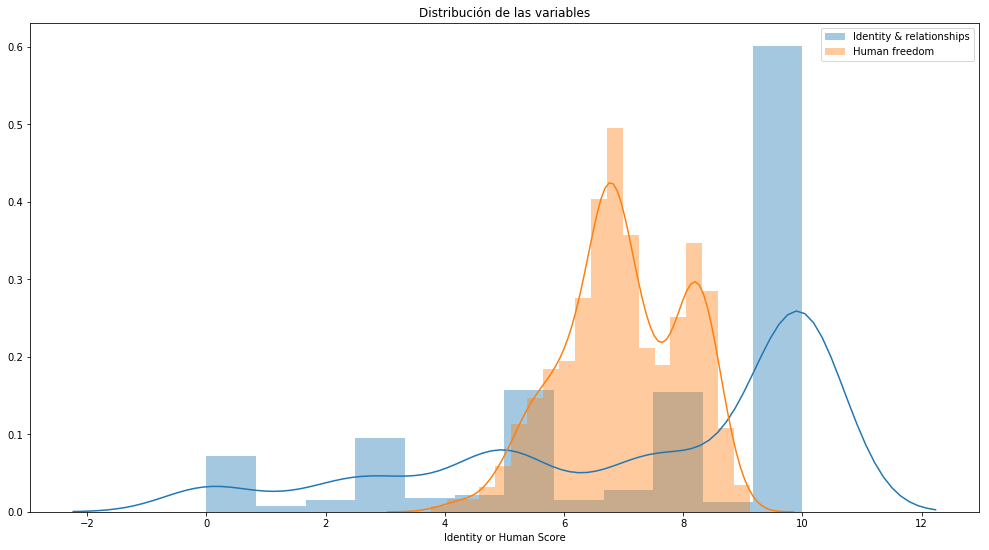

In [137]:
plt.figure(figsize=(17,9))
seaborn.distplot(a=important_dataset['pf_identity'].dropna(), label='Identity & relationships')
seaborn.distplot(a=important_dataset['hf_score'].dropna(), label='Human freedom')
plt.xlabel('Identity or Human Score')
plt.title('Distribución de las variables')
plt.legend()
plt.show()

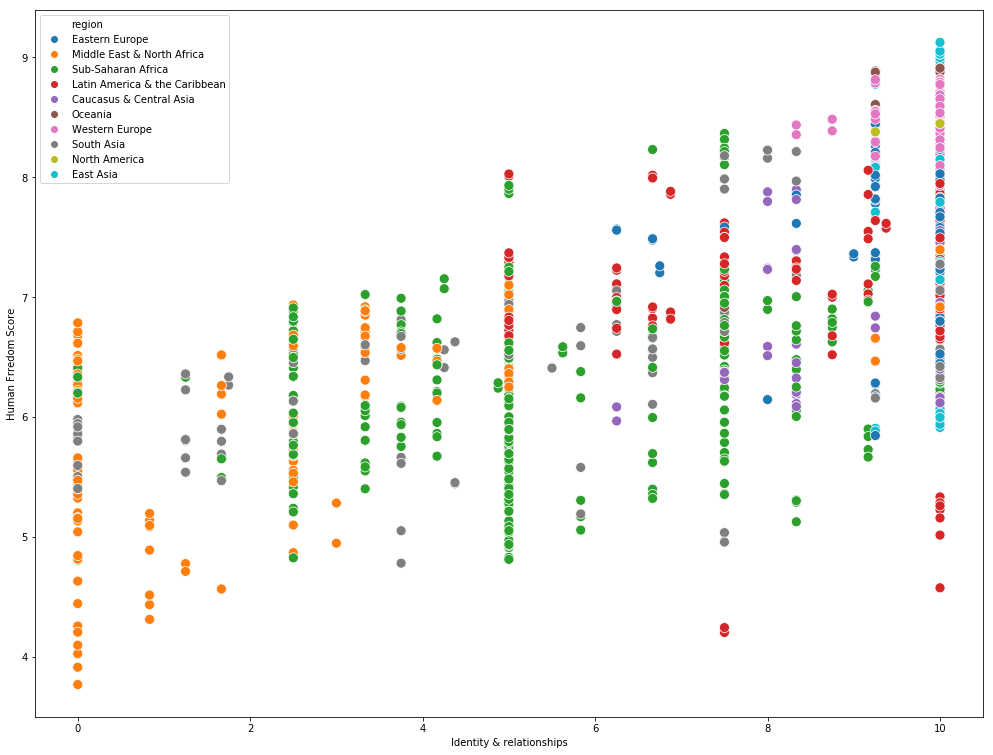

In [138]:
plt.figure(figsize=(17,13))
seaborn.scatterplot(data=important_dataset, 
                    x='pf_identity', y='hf_score', 
                    hue='region', s=100)
plt.ylabel('Human Frredom Score')
plt.xlabel('Identity & relationships')
plt.legend()
plt.show()

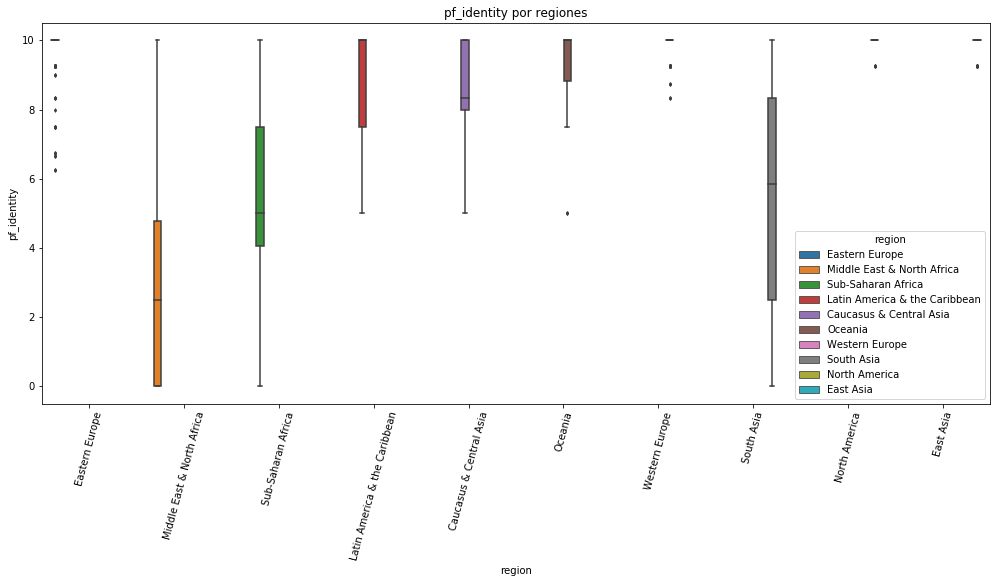

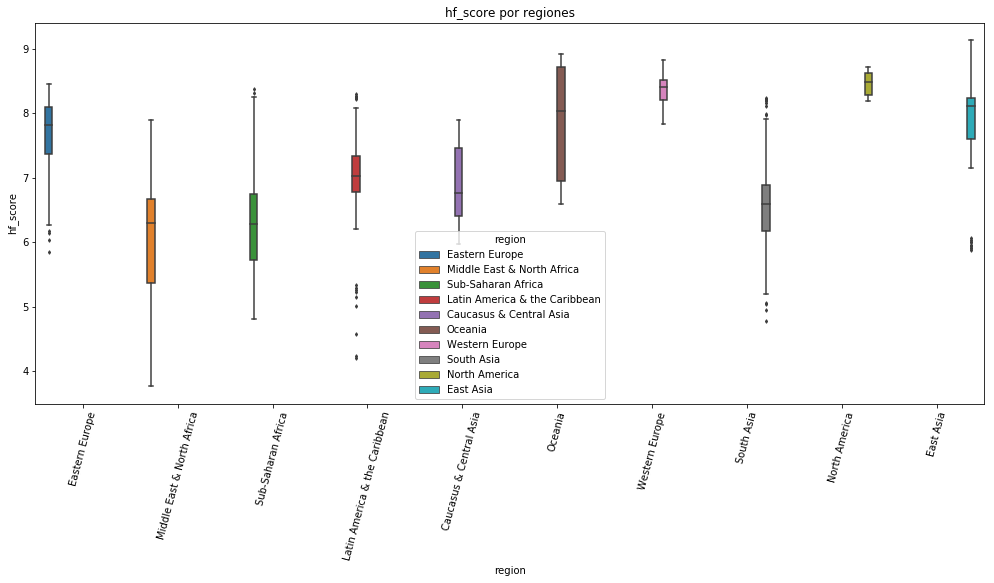

In [179]:
plt.figure(figsize=(17,7))
seaborn.boxplot(data=important_dataset, x='region', y=important_dataset['pf_identity'], hue='region', fliersize=2.5)
plt.title('pf_identity por regiones')
plt.xticks(rotation=75)
plt.show()
plt.figure(figsize=(17,7))
seaborn.boxplot(data=important_dataset, x='region', y=important_dataset['hf_score'], hue='region', fliersize=2.5)
plt.title('hf_score por regiones')
plt.xticks(rotation=75)
plt.show()

## 1.4 ¿Cómo pueden sanearse los valores faltantes?

## 1.5 ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?

In [201]:
# uscar outliers definidos como los que están a 2.5 rangos intercuartíles
# o arriba del tercer cuartil o debajo del primero
import numpy as np
series = [important_dataset['pf_identity'], important_dataset['hf_score']]
outliers_coefs = [1.5, 2.5]

def get_outliers(serie, coef=1.5):
    serie = serie.dropna()
    q1, q3 = np.percentile(serie,[25,75])
    iq = q3 - q1
    # print('q1:{}, q3:{}, iq:{}'.format(q1, q3, iq))
    lower_bound = q1 - (coef * iq)
    upper_bound = q3 + (coef * iq)
    # print('li:{}, ls:{}'.format(lower_bound, upper_bound))
    
    outliers = [d for d in serie if d < lower_bound or d > upper_bound]
    # print('outliers [{}]: {}'.format(oc, outliers))
    return outliers, q1, q3, lower_bound, upper_bound, iq

for serie in series:
    serie = serie.dropna()
    for oc in outliers_coefs:
        outliers, q1, q3, lower_bound, upper_bound, iq = get_outliers(serie, oc)
        print('outliers [{}]: {}. q1: {}, q3:{}, iqr: {}, inf:{}, sup: {}'.format(oc, outliers, q1, q3, iq, lower_bound, upper_bound))

outliers [1.5]: []. q1: 5.0, q3:10.0, iqr: 5.0, inf:-2.5, sup: 17.5
outliers [2.5]: []. q1: 5.0, q3:10.0, iqr: 5.0, inf:-7.5, sup: 22.5
outliers [1.5]: [3.765826877, 3.9108264289999997]. q1: 6.336684521, q3:7.89466011025, iqr: 1.5579755892500007, inf:3.9997211371249985, sup: 10.231623494125001
outliers [2.5]: []. q1: 6.336684521, q3:7.89466011025, iqr: 1.5579755892500007, inf:2.441745547874998, sup: 11.789599083375002


Hay outliers en el _human score_ pero son solo dos y muy cercanos al limite mínimo desde 
donde los consideramos outliers.
Los outliers por grupo (regiones) son mas comunes y se ven en el boxplot anterior.
Antes de eliminar los outliers yo **revisaría los grupos**. Por ejemplo Latinoamérica pordría separarse Caribe.

## 2. Distribuciones
### 2.1 Graficar en un mismo histograma la distribución de la variable pf_identity en global, y en Latinoamérica y el caribe. Repetir para la variable hf_score. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?

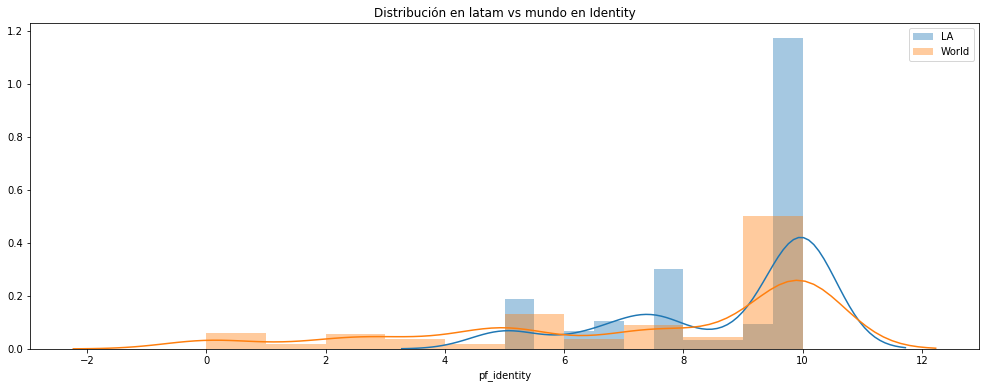

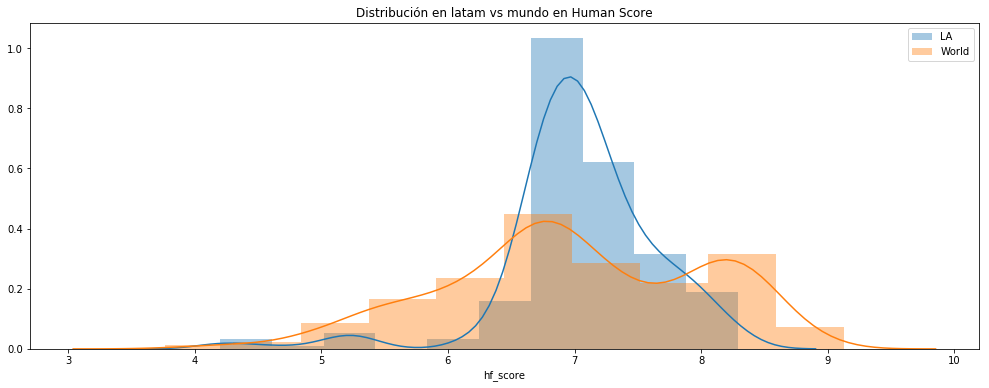

In [187]:
# 2.1
plt.figure(figsize=(17,6))
seaborn.distplot(a=latin_america['pf_identity'].dropna(), label='LA', bins=10)
seaborn.distplot(a=important_dataset['pf_identity'].dropna(), label='World', bins=10)
plt.title('Distribución en latam vs mundo en Identity')
plt.legend()
plt.show()

plt.figure(figsize=(17,6))
seaborn.distplot(a=latin_america['hf_score'].dropna(), label='LA', bins=10)
seaborn.distplot(a=important_dataset['hf_score'].dropna(), label='World', bins=10)
plt.title('Distribución en latam vs mundo en Human Score')
plt.legend()
plt.show()

Visualmente parece una distribucion binomial para el mundo en hf_socre y una normal con muchos outliers en latam. La mezcla de latam + Caribe se supone como un grupo heterogéneo, los divido.

Paises agrupados en latam: ['Argentina' 'Bahamas' 'Barbados' 'Belize' 'Bolivia' 'Brazil' 'Chile'
 'Colombia' 'Costa Rica' 'Dominican Rep.' 'Ecuador' 'El Salvador'
 'Guatemala' 'Guyana' 'Haiti' 'Honduras' 'Jamaica' 'Mexico' 'Nicaragua'
 'Panama' 'Paraguay' 'Peru' 'Suriname' 'Trinidad and Tobago' 'Uruguay'
 'Venezuela']


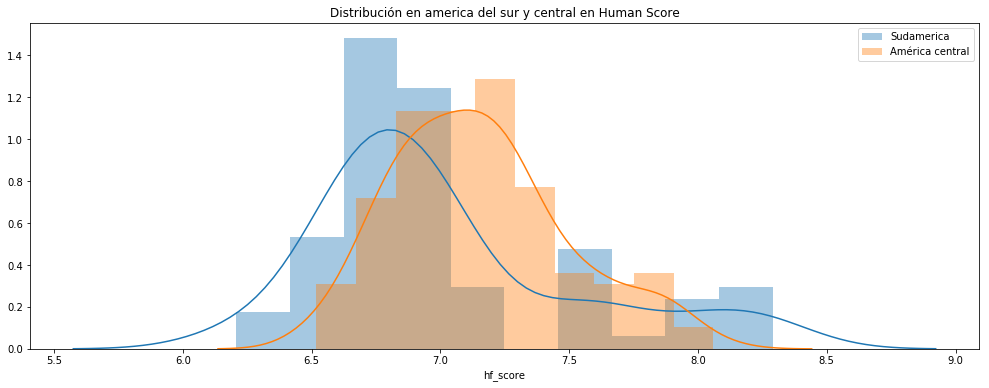

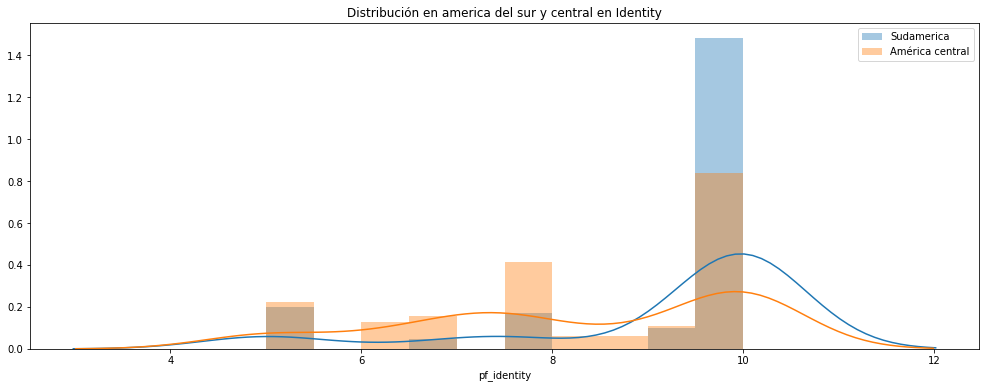

In [213]:
paises_latam = latin_america['countries'].unique()
print('Paises agrupados en latam: {}'.format(paises_latam))
sud_countries = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Guyana', 
         'Colombia',  'Ecuador',  'Paraguay', 'Peru', 'Suriname' 'Uruguay' 'Venezuela']
america_central_countries =['Bahamas', 'Barbados', 'Belize', 'Costa Rica', 'Dominican Rep.', 'El Salvador',
 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua',
 'Panama', 'Trinidad and Tobago']

sudamerica = latin_america[latin_america['countries'].isin(sud_countries)]
# print(sudamerica)
america_central = latin_america[latin_america['countries'].isin(america_central_countries)]
# print(america_central)

#AHORA DIBUJO LAS regiones separadas
plt.figure(figsize=(17,6))
seaborn.distplot(a=sudamerica['hf_score'].dropna(), label='Sudamerica', bins=10)
seaborn.distplot(a=america_central['hf_score'].dropna(), label='América central', bins=10)
# seaborn.distplot(a=important_dataset['hf_score'].dropna(), label='World', bins=10)
plt.title('Distribución en america del sur y central en Human Score')
plt.legend()
plt.show()

plt.figure(figsize=(17,6))
seaborn.distplot(a=sudamerica['pf_identity'].dropna(), label='Sudamerica', bins=10)
seaborn.distplot(a=america_central['pf_identity'].dropna(), label='América central', bins=10)
# seaborn.distplot(a=important_dataset['hf_score'].dropna(), label='World', bins=10)
plt.title('Distribución en america del sur y central en Identity')
plt.legend()
plt.show()

In [210]:
print('Es mejor pero es claro que son regiones heterogéneas. Vemos outliers')

outliers, q1, q3, lower_bound, upper_bound, iq = get_outliers(serie=sudamerica['hf_score'], coef=2.5)
print('outliers Sudamerica hf_score [{}]: {}\n q1: {}, q3:{}, iqr: {}, inf:{}, sup: {}'.format(oc, outliers, q1, q3, iq, lower_bound, upper_bound))

outliers, q1, q3, lower_bound, upper_bound, iq = get_outliers(serie=america_central['hf_score'], coef=2.5)
print('outliers america central hf_score [{}]: {}\n q1: {}, q3:{}, iqr: {}, inf:{}, sup: {}'.format(oc, outliers, q1, q3, iq, lower_bound, upper_bound))

outliers, q1, q3, lower_bound, upper_bound, iq = get_outliers(serie=sudamerica['pf_identity'], coef=2.5)
print('outliers Sudamerica pf_identity [{}]: {}\n q1: {}, q3:{}, iqr: {}, inf:{}, sup: {}'.format(oc, outliers, q1, q3, iq, lower_bound, upper_bound))

outliers, q1, q3, lower_bound, upper_bound, iq = get_outliers(serie=america_central['pf_identity'], coef=2.5)
print('outliers america central pf_identity [{}]: {}\n q1: {}, q3:{}, iqr: {}, inf:{}, sup: {}'.format(oc, outliers, q1, q3, iq, lower_bound, upper_bound))


Es mejor pero es claro que son regiones heterogéneas. Vemos outliers
outliers Sudamerica hf_score [2.5]: [8.219910779, 8.290152327000001, 8.271367096, 8.249135968, 8.227215073]
 q1: 6.70229469, q3:7.113477065, iqr: 0.4111823749999992, inf:5.674338752500002, sup: 8.141433002499998
outliers america central hf_score [2.5]: []
 q1: 6.90456648025, q3:7.333963436, iqr: 0.4293969557500006, inf:5.831074090874998, sup: 8.407455825375003
outliers Sudamerica pf_identity [2.5]: [7.5, 5.0, 5.0, 7.5, 7.5, 5.0, 5.0, 7.5, 6.666666667, 5.0, 6.666666667, 5.0, 7.5, 5.0, 7.5, 5.0, 7.5]
 q1: 9.375, q3:10.0, iqr: 0.625, inf:7.8125, sup: 11.5625
outliers america central pf_identity [2.5]: []
 q1: 7.03125, q3:10.0, iqr: 2.96875, inf:-0.390625, sup: 17.421875


### 2.2 Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

In [238]:
import scipy as sc

la = latin_america['hf_score'].dropna()
sa = sudamerica['hf_score'].dropna()
ac = america_central['hf_score'].dropna()

def is_normal(serie, titulo, p_value_min=0.05):
    media, desviacion = sc.stats.norm.fit(serie)
    d, p_valor = sc.stats.kstest(rvs=serie, cdf='norm', args=(media, desviacion))
    p_valor = round(p_valor, 5)
    if p_valor < p_value_min:
        respuesta = "{}: No se ajusta a una normal (p:{} < {})".format(titulo, p_valor, p_value_min)
    else:
        respuesta = "{}: Se puede ajustar a una normal (p={})".format(titulo, p_valor)
    
    return d, p_valor, respuesta

d, p, respuesta = is_normal(serie=la, titulo='latinoamerica + caribe HF SOCRE')
print(respuesta)

d, p, respuesta = is_normal(serie=sa, titulo='sudamerica HF SOCRE')
print(respuesta)

d, p, respuesta = is_normal(serie=ac, titulo='America central HF SOCRE')
print(respuesta)

la = latin_america['pf_identity'].dropna()
sa = sudamerica['pf_identity'].dropna()
ac = america_central['pf_identity'].dropna()

d, p, respuesta = is_normal(serie=la, titulo='latinoamerica + caribe IDENTITY')
print(respuesta)

d, p, respuesta = is_normal(serie=sa, titulo='sudamerica IDENTITY')
print(respuesta)

d, p, respuesta = is_normal(serie=ac, titulo='America central IDENTITY')
print(respuesta)


latinoamerica + caribe HF SOCRE: No se ajusta a una normal (p:5e-05 < 0.05)
sudamerica HF SOCRE: No se ajusta a una normal (p:0.00115 < 0.05)
America central HF SOCRE: Se puede ajustar a una normal (p=0.68974)
latinoamerica + caribe IDENTITY: No se ajusta a una normal (p:0.0 < 0.05)
sudamerica IDENTITY: No se ajusta a una normal (p:0.0 < 0.05)
America central IDENTITY: No se ajusta a una normal (p:0.0 < 0.05)


### 2.3 Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
### 2.4 Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

### 2.3 Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
### 2.4 Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

## 3. Correlaciones. En este ejercicio queremos responder a las preguntas
Las libertades sociales y económicas, ¿van siempre de la mano?
¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?
Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score.

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación.

### 3.1 ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
### 3.2 Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
### 3.3 Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no.
### 3.4 [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable region es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)